# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [11]:
# Write your code here
import nltk
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/n

True

In [12]:
# Read and format the text file
import pandas as pd
test_label, test_data, train_label, train_data = [], [], [], []

with open('stsa-test.txt') as f:
    test_contents = f.read()

for line in test_contents.split("\n"):
  items = line.split(' ')
  test_label.append(items[0])
  test_data.append(" ".join(items[1:]))

with open('stsa-train.txt') as f:
    train_contents = f.read()

for line in train_contents.split("\n"):
  items2 = line.split(' ')
  train_label.append(items2[0])
  train_data.append(" ".join(items2[1:]))

# Create Data Frame
df_train = pd.DataFrame (list(zip(train_data, train_label)) , columns = ['text', 'label'])
df_test = pd.DataFrame (list(zip(test_data, test_label)) , columns = ['text', 'label'])

df_train = df_train.dropna()
df_test = df_test.dropna()

In [18]:
# clean dataset
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word

nltk.download('wordnet')
st = PorterStemmer()
nltk.download('punkt')
stop = stopwords.words('english')

#Lower case
df_train['lowercase'] = df_train['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Remove Punctuation
df_train['remove punctuations'] = df_train['lowercase'].str.replace('[^\w\s]','')
#Remove special charachters
df_train['no special charachters'] = df_train['remove punctuations'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
#Remove stopwords
df_train['no stopwords'] = df_train['no special charachters'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Tokenization
df_train['Tokenization'] = df_train['no stopwords'].apply(lambda x: TextBlob(x).words)
#Lemmatization
df_train['lemmatized'] = df_train['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))
df_train

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.


,text,label,lowercase,remove punctuations,no special charachters,no stopwords,Tokenization,After lemmatization,lemmatized
0,"a stirring , funny and finally transporting re...",1,"a stirring , funny and finally transporting re...",a stirring funny and finally transporting rei...,a stirring funny and finally transporting rei...,stirring funny finally transporting reimaginin...,"[stirring, funny, finally, transporting, reima...",stirring funny finally transporting reimaginin...,stirring funny finally transporting reimaginin...
1,apparently reassembled from the cutting-room f...,0,apparently reassembled from the cutting-room f...,apparently reassembled from the cuttingroom fl...,apparently reassembled from the cuttingroom fl...,apparently reassembled cuttingroom floor given...,"[apparently, reassembled, cuttingroom, floor, ...",apparently reassembled cuttingroom floor given...,apparently reassembled cuttingroom floor given...
2,they presume their audience wo n't sit still f...,0,they presume their audience wo n't sit still f...,they presume their audience wo nt sit still fo...,they presume their audience wo nt sit still fo...,presume audience wo nt sit still sociology les...,"[presume, audience, wo, nt, sit, still, sociol...",presume audience wo nt sit still sociology les...,presume audience wo nt sit still sociology les...
3,this is a visually stunning rumination on love...,1,this is a visually stunning rumination on love...,this is a visually stunning rumination on love...,this is a visually stunning rumination on love...,visually stunning rumination love memory histo...,"[visually, stunning, rumination, love, memory,...",visually stunning rumination love memory histo...,visually stunning rumination love memory histo...
4,jonathan parker 's bartleby should have been t...,1,jonathan parker 's bartleby should have been t...,jonathan parker s bartleby should have been th...,jonathan parker s bartleby should have been th...,jonathan parker bartleby beallendall modernoff...,"[jonathan, parker, bartleby, beallendall, mode...",jonathan parker bartleby beallendall modernoff...,jonathan parker bartleby beallendall modernoff...
...,...,...,...,...,...,...,...,...,...
6916,take care is nicely performed by a quintet of ...,0,take care is nicely performed by a quintet of ...,take care is nicely performed by a quintet of ...,take care is nicely performed by a quintet of ...,take care nicely performed quintet actresses n...,"[take, care, nicely, performed, quintet, actre...",take care nicely performed quintet actress non...,take care nicely performed quintet actress non...
6917,"the script covers huge , heavy topics in a bla...",0,"the script covers huge , heavy topics in a bla...",the script covers huge heavy topics in a blan...,the script covers huge heavy topics in a blan...,script covers huge heavy topics bland surfacey...,"[script, covers, huge, heavy, topics, bland, s...",script cover huge heavy topic bland surfacey w...,script cover huge heavy topic bland surfacey w...
6918,a seriously bad film with seriously warped log...,0,a seriously bad film with seriously warped log...,a seriously bad film with seriously warped log...,a seriously bad film with seriously warped log...,seriously bad film seriously warped logic writ...,"[seriously, bad, film, seriously, warped, logi...",seriously bad film seriously warped logic writ...,seriously bad film seriously warped logic writ...
6919,a deliciously nonsensical comedy about a city ...,1,a deliciously nonsensical comedy about a city ...,a deliciously nonsensical comedy about a city ...,a deliciously nonsensical comedy about a city ...,deliciously nonsensical comedy city coming apa...,"[deliciously, nonsensical, comedy, city, comin...",deliciously nonsensical comedy city coming apa...,deliciously nonsensical comedy city coming apa...


In [19]:

#Lower case
df_test['lowercase'] = df_test['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Remove Punctuation
df_test['remove punctuations'] = df_test['lowercase'].str.replace('[^\w\s]','')
#Remove special charachters
df_test['no special charachters'] = df_test['remove punctuations'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
#Remove stopwords
df_test['no stopwords'] = df_test['no special charachters'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Tokenization
df_test['Tokenization'] = df_test['no stopwords'].apply(lambda x: TextBlob(x).words)
#Lemmatization
df_test['lemmatized'] = df_test['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

df_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,text,label,lowercase,remove punctuations,no special charachters,no stopwords,Tokenization,After lemmatization,lemmatized
0,"no movement , no yuks , not much of anything .",0,"no movement , no yuks , not much of anything .",no movement no yuks not much of anything,no movement no yuks not much of anything,movement yuks much anything,"[movement, yuks, much, anything]",movement yuks much anything,movement yuks much anything
1,"a gob of drivel so sickly sweet , even the eag...",0,"a gob of drivel so sickly sweet , even the eag...",a gob of drivel so sickly sweet even the eage...,a gob of drivel so sickly sweet even the eage...,gob drivel sickly sweet even eager consumers m...,"[gob, drivel, sickly, sweet, even, eager, cons...",gob drivel sickly sweet even eager consumer mo...,gob drivel sickly sweet even eager consumer mo...
2,"gangs of new york is an unapologetic mess , wh...",0,"gangs of new york is an unapologetic mess , wh...",gangs of new york is an unapologetic mess who...,gangs of new york is an unapologetic mess who...,gangs new york unapologetic mess whose saving ...,"[gangs, new, york, unapologetic, mess, whose, ...",gang new york unapologetic mess whose saving g...,gang new york unapologetic mess whose saving g...
3,"we never really feel involved with the story ,...",0,"we never really feel involved with the story ,...",we never really feel involved with the story ...,we never really feel involved with the story ...,never really feel involved story ideas remain ...,"[never, really, feel, involved, story, ideas, ...",never really feel involved story idea remain a...,never really feel involved story idea remain a...
4,this is one of polanski 's best films .,1,this is one of polanski 's best films .,this is one of polanski s best films,this is one of polanski s best films,one polanski best films,"[one, polanski, best, films]",one polanski best film,one polanski best film
...,...,...,...,...,...,...,...,...,...
1817,the problem with concept films is that if the ...,0,the problem with concept films is that if the ...,the problem with concept films is that if the ...,the problem with concept films is that if the ...,problem concept films concept poor one saving ...,"[problem, concept, films, concept, poor, one, ...",problem concept film concept poor one saving m...,problem concept film concept poor one saving m...
1818,"safe conduct , however ambitious and well-inte...",0,"safe conduct , however ambitious and well-inte...",safe conduct however ambitious and wellintent...,safe conduct however ambitious and wellintent...,safe conduct however ambitious wellintentioned...,"[safe, conduct, however, ambitious, wellintent...",safe conduct however ambitious wellintentioned...,safe conduct however ambitious wellintentioned...
1819,"a film made with as little wit , interest , an...",0,"a film made with as little wit , interest , an...",a film made with as little wit interest and ...,a film made with as little wit interest and ...,film made little wit interest professionalism ...,"[film, made, little, wit, interest, profession...",film made little wit interest professionalism ...,film made little wit interest professionalism ...
1820,"but here 's the real damn : it is n't funny , ...",0,"but here 's the real damn : it is n't funny , ...",but here s the real damn it is nt funny either,but here s the real damn it is nt funny either,real damn nt funny either,"[real, damn, nt, funny, either]",real damn nt funny either,real damn nt funny either


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# Transaform the text
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm

def transform_text(df):
  df_vectorizer = TfidfVectorizer(analyzer='word')
  df_vectorizer.fit(df['lemmatized'])
  tfidf =  df_vectorizer.transform(df_train['lemmatized'])
  return tfidf, df_vectorizer

x_tfidf, train_idf_vect = transform_text(df_train)

In [26]:
#Data Tranformation of test data set
vect_test = TfidfVectorizer(analyzer='word', vocabulary = train_idf_vect.vocabulary_)
vect_test.fit(df_test['lemmatized'])
xtest = vect_test.transform(df_test['lemmatized'])
test_y = df_test['label']
test_y

0       0
1       0
2       0
3       0
4       1
       ..
1817    0
1818    0
1819    0
1820    0
1821     
Name: label, Length: 1822, dtype: object

In [31]:
# split the data into train and test
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

tr_x, valid_x, tr_y, valid_y = model_selection.train_test_split(x_tfidf, df_train['label'].values,test_size=0.2)

def get_mtrcs(predictions, test_y):
  acc_score = metrics.accuracy_score(predictions, test_y)
  prec_score = metrics.precision_score(predictions, test_y, pos_label='positive', average='micro')
  recall_score = metrics.recall_score(predictions, test_y, pos_label='positive', average='micro')
  f1_score = metrics.f1_score(predictions, test_y, pos_label='positive', average='micro')
  return acc_score, prec_score, recall_score, f1_score


def cross_valid_score(model, x, y):
  kfold = KFold(10, random_state = 7, shuffle=True)
  cross_val = cross_val_score(model, x, y, cv=kfold).mean()
  return cross_val



In [32]:
#Navie Bayes - Validation Metrics

nbm = naive_bayes.MultinomialNB()
nbm.fit(tr_x, tr_y)
nbpvdata = nbm.predict(valid_x)
acc_score, prec_score, recall_score, f1_score = get_mtrcs(nbpvdata, valid_y)
print("Accuracy: ", acc_score,"\nPrecision",prec_score,"\nRecall:", recall_score,"\nF1:", f1_score)

#cross validation scores of Navie Bayes
nb_scores_mean = cross_valid_score(nbm, valid_x, valid_y)
print('Navie Bayes Cross Validation Score is ',nb_scores_mean)

#Testing Metrics
nbpt_data = nbm.predict(xtest)
acc, prec, recall, f1 = get_mtrcs(nbpt_data, test_y)
print("Accuracy:", acc,"\nPrecision:",prec,"\nRecall:",recall,"\nF1:",f1)

#cross validation
test_mean = cross_val_score(nbm, xtest, test_y)
print('Navie Bayes Cross Validation Score:', test_mean)

Accuracy:  0.7768953068592058 
Precision 0.7768953068592058 
Recall: 0.7768953068592058 
F1: 0.7768953068592058
Navie Bayes Cross Validation Score is  0.7039985402981962
Accuracy: 0.7930845225027442 
Precision: 0.7930845225027442 
Recall: 0.7930845225027442 
F1: 0.7930845225027442
Navie Bayes Cross Validation Score: [0.71506849 0.73972603 0.70879121 0.72527473 0.74450549]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels

In [33]:
# SVM
svm_model = svm.SVC()
svm_model.fit(tr_x, tr_y)
svm_predict = svm_model.predict(valid_x)
acc_svm_score, prec_svm_score, recall_svm_score, f1_svm_score = get_mtrcs(svm_predict, valid_y)
print("Validation metrics for SVM:\n")
print("Accuracy:", acc_svm_score,"\nPrecision:",prec_svm_score,"\nRecall:",recall_svm_score,"\nF1:",f1)

#cross validation scores- svm
svm_mean = cross_val_score(svm_model, valid_x, valid_y)
print('SVM - Cross Validation Score: ', svm_mean)


#Testing Metrics
svm_pred_test_dt = svm_model.predict(xtest)
accuracy, precision, recall, f1 = get_mtrcs(svm_pred_test_dt, test_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation scores
svm_test_scores_mean = cross_val_score(svm_model, xtest, test_y)
print('SVM Cross Validation Score is:', svm_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Validation metrics for SVM:

Accuracy: 0.7747292418772563 
Precision: 0.7747292418772563 
Recall: 0.7747292418772563 
F1: 0.7930845225027442
SVM - Cross Validation Score:  [0.6967509  0.63898917 0.67509025 0.68231047 0.70397112]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Accuracy is  0.787596048298573 
Precision is 0.787596048298573 
Recall is: 0.787596048298573 
F1 is: 0.7875960482985729
SVM Cross Validation Score is: [0.7260274  0.7369863  0.68956044 0.70054945 0.73901099]


In [34]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(tr_x, tr_y)
knn_pred_val_dt = knn_model.predict(valid_x)
acc_knn_score, prec_knn_score, recall_knn_score, f1_knn_score = get_mtrcs(knn_pred_val_dt, valid_y)

print("Accuracy:", acc_knn_score,"\nPrecision:",prec_knn_score,"\nRecall:",recall_knn_score,"\nF1:",f1_knn_score)

#cross validation
knn_scores_mean = cross_val_score(knn_model, valid_x, valid_y)
print('KNN Cross Validation Score:', knn_scores_mean)

#Testing Metrics
knn_pred_test = knn_model.predict(xtest)
accu, precision, recall, f1 = get_mtrcs(knn_pred_test, test_y)
print("Accuracy:", accu,"\nPrecision:",precision,"\nRecall:",recall,"\nF1:",f1)

#cross validation scores-Testing 
knn_test_scores_mean = cross_val_score(knn_model, xtest, test_y)
print('KNN Cross Validation', knn_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy: 0.7184115523465704 
Precision: 0.7184115523465704 
Recall: 0.7184115523465704 
F1: 0.7184115523465703
KNN Cross Validation Score: [0.67148014 0.68592058 0.67509025 0.67148014 0.64259928]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Accuracy: 0.7338090010976949 
Precision: 0.7338090010976949 
Recall: 0.7338090010976949 
F1: 0.7338090010976949
KNN Cross Validation [0.69041096 0.69041096 0.5989011  0.62637363 0.62637363]


In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(tr_x, tr_y)

dt_predic_val_dt = decision_tree_model.predict(valid_x)
acc_dt_score, prec_dt_score, recall_dt_score, f1_dt_score = get_mtrcs(dt_predic_val_dt, valid_y)
print("Accuracy:", accuracy,"\nPrecision:",precision,"\nRecall:",recall,"\nF1:",f1)

#cross validation
decision_tree_scores_mean = cross_val_score(decision_tree_model, valid_x, valid_y)
print('Decision Tree Cross Validation Score is',decision_tree_scores_mean)

#Testing Metrics
decision_tree_predictions_test_data = decision_tree_model.predict(xtest)
accuracy, precision, recall, f1 = get_mtrcs(decision_tree_predictions_test_data, test_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation
decision_tree_test_scores_mean = cross_val_score(decision_tree_model, xtest, test_y)
print('Decision Tree Cross Validation Score is', decision_tree_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy: 0.787596048298573 
Precision: 0.7338090010976949 
Recall: 0.7338090010976949 
F1: 0.7338090010976949
Decision Tree Cross Validation Score is [0.54151625 0.59927798 0.61371841 0.566787   0.58483755]
Accuracy is  0.6608122941822173 
Precision is 0.6608122941822173 
Recall is: 0.6608122941822173 
F1 is: 0.6608122941822173


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Decision Tree Cross Validation Score is [0.59726027 0.64383562 0.61538462 0.6456044  0.65384615]


In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(tr_x, tr_y)

rf_predict_val_dt = random_forest_model.predict(valid_x)
accuracy_rf_score, precision_rf_score, recall_rf_score, f1_rf_score = get_mtrcs(rf_predict_val_dt, valid_y)
print("Accuracy:", accuracy,"\nPrecision:",precision,"\nRecall:",recall,"\nF1:",f1)

#cross val score
random_forest_scores_mean = cross_val_score(random_forest_model, valid_x, valid_y)
print('Random Forest Cross Validation Score is {0}'.format(random_forest_scores_mean))

#Testing Metrics
random_forest_predictions_test_data = random_forest_model.predict(xtest)
accuracy, precision, recall, f1 = get_mtrcs(random_forest_predictions_test_data, test_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation score testing
random_forest_test_scores_mean = cross_val_score(random_forest_model, xtest, test_y)
print('Random Forest Cross Validation Score is', random_forest_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy: 0.6608122941822173 
Precision: 0.6608122941822173 
Recall: 0.6608122941822173 
F1: 0.6608122941822173
Random Forest Cross Validation Score is [0.66787004 0.67509025 0.63898917 0.63176895 0.64981949]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Accuracy is  0.7360043907793633 
Precision is 0.7360043907793633 
Recall is: 0.7360043907793633 
F1 is: 0.7360043907793633
Random Forest Cross Validation Score is [0.65205479 0.66027397 0.69505495 0.65934066 0.68956044]


In [37]:
#XGBoost
from xgboost import XGBClassifier
xg_boost_model = XGBClassifier()

xg_boost_model.fit(tr_x, tr_y)

xgb_predict_val_dt = xg_boost_model.predict(valid_x)
accuracy, precision, recall, f1 = get_mtrcs(xgb_predict_val_dt, valid_y)
print("Accuracy:", accuracy,"\nPrecision:",precision,"\nRecall:",recall,"\nF1:",f1)

#cross validation score
xg_boost_scores_mean = cross_val_score(XGBClassifier(), valid_x, valid_y)
print('XGB Cross Validation Score:', xg_boost_scores_mean)

#Testing
xgb_pred_test_data = xg_boost_model.predict(xtest)
accuracy, precision, recall, f1 = get_mtrcs(xgb_pred_test_data, test_y)
print("Accuracy:", accuracy,"\nPrecision:",precision,"\nRecall:",recall,"\nF1:",f1)

#cross validation score testing
xg_boost_test_scores_mean = cross_val_score(XGBClassifier(), xtest, test_y)
print('XGB Cross Validation Score:',xg_boost_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy: 0.6469314079422382 
Precision: 0.6469314079422382 
Recall: 0.6469314079422382 
F1: 0.6469314079422382
XGB Cross Validation Score: [0.64981949 0.60649819 0.57039711 0.64981949 0.59205776]
Accuracy: 0.6361141602634468 
Precision: 0.6361141602634468 
Recall: 0.6361141602634468 
F1: 0.6361141602634468


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


XGB Cross Validation Score: [0.59726027 0.62465753 0.60714286 0.61538462 0.62637363]


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [39]:
#Write your code here.
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!


True

In [43]:
#You can write you answer here. (No code needed)

import pandas as pd
import seaborn as sns

amazon_review = pd.read_csv("Amazon_Unlocked_Mobile.csv")
amazon_review = amazon_review.head(5000)

No_NullValues = amazon_review.dropna()
No_NullValues.shape

(3422, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


positive    2522
negative     900
Name: Rating, dtype: int64

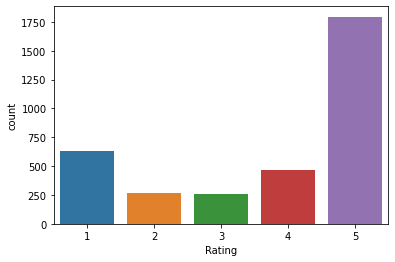

In [44]:
sns.countplot(No_NullValues.Rating)
#classifying
def Classification_review(rating):
    if rating < 3:
        return 'negative'
    return 'positive'

Classification_rating = No_NullValues['Rating'].map(Classification_review) 
No_NullValues['Rating'] = Classification_rating
No_NullValues['Rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


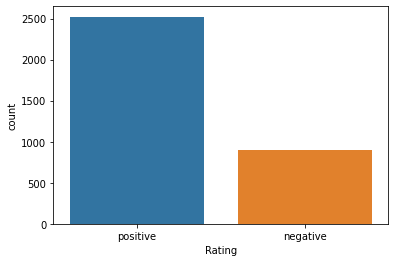

In [45]:
import seaborn as sns
sns.countplot(No_NullValues.Rating)

In [46]:
#pre processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import re

c=0;
for i in No_NullValues['Reviews'].values:
    if (len(re.findall('<.*?>', i))):
        print(c)
        print(i)
        break;
    c += 1;

def html(sentence):
    cleaned= re.compile('<.*?>')
    cleaned_text = re.sub(cleaned, ' ', sentence)
    return cleaned_text

#lower case
No_NullValues['lowercasing'] = No_NullValues['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#clean html
No_NullValues['clean HTML'] = No_NullValues['lowercasing'].apply(lambda x: html(x))
#Removing special charachters
No_NullValues['clean Txt'] = No_NullValues['clean HTML'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
#stop words removal
No_NullValues['clean Txt'] = No_NullValues['clean Txt'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [50]:
from sklearn.cluster import KMeans

In [53]:
# k means
from sklearn.feature_extraction.text import CountVectorizer
vector_count = CountVectorizer()
#from sklearn.cluster import KMeans

counted = vector_count.fit_transform(No_NullValues['clean Txt'].values)
column_names = vector_count.get_feature_names()

model = KMeans(n_clusters=10, init='k-means++', random_state=99)

model.fit(counted)

label = model.labels_
cc = model.cluster_centers_
print(cc)

from sklearn import metrics
ss = metrics.silhouette_score(counted, label, metric='euclidean')
print(ss)

data_frame = No_NullValues
data_frame['Bow Clus Label'] = model.labels_
data_frame.groupby(['Bow Clus Label'])['Reviews'].count()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[0.0031348  0.         0.         ... 0.00089566 0.         0.        ]
 [0.00985915 0.00140845 0.0028169  ... 0.0028169  0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.02258065 0.         0.00645161 ... 0.00322581 0.00645161 0.00967742]
 [0.         0.         0.         ... 0.         0.         0.        ]]
0.19659068487820835


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bow Clus Label
0    2233
1     710
2       1
3     141
4      20
5       3
6       1
7       1
8     310
9       2
Name: Reviews, dtype: int64

cluster ranking per term
Cluster 0: phone
 great
 good
 works
 price
 screen
 like
 love
 work
 one
Cluster 1: phone
 great
 screen
 good
 one
 price
 work
 use
 would
 new
Cluster 2: phone
 issues
 great
 lte
 software
 good
 gps
 annoying
 youtube
 turned
Cluster 3: phone
 screen
 good
 use
 one
 like
 great
 battery
 sim
 camera
Cluster 4: phone
 screen
 like
 camera
 one
 battery
 good
 use
 would
 get
Cluster 5: phone
 screen
 data
 tracfone
 like
 android
 alcatel
 good
 really
 time
Cluster 6: phone
 note
 one
 even
 would
 sd
 dollar
 compared
 card
 screen
Cluster 7: phone
 quality
 good
 one
 like
 moto
 camera
 light
 display
 experience
Cluster 8: phone
 screen
 good
 great
 one
 like
 camera
 would
 battery
 get
Cluster 9: phone
 camera
 like
 idol
 sound
 one
 screen
 feature
 use
 price


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


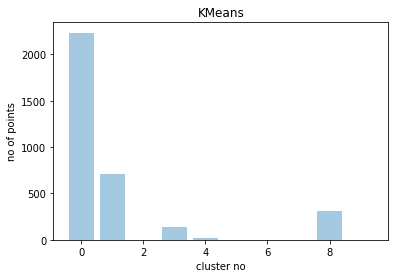

In [54]:
print("cluster ranking per term")
order = model.cluster_centers_.argsort()[:, ::-1]
terms_count = vector_count.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order[i, :10]:
        print(' %s' % terms_count[ind], end='')
        print()

import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], data_frame.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans')
plt.xlabel("cluster no")
plt.ylabel("no of points")
plt.show()

In [55]:
l = []
for i in No_NullValues['clean Txt'].values:
    l.append(i.split())

import gensim
w_v_model=gensim.models.Word2Vec(l,size=100, workers=4)


import numpy as np
vector_sentence = []
for i in l:
  sentence_vector = np.zeros(100)
  count = 0
  for word in i:
    try:
      vec = w_v_model.wv[word]
      sentence_vector += vec
      count += 1
    except:
      pass
  sentence_vector /= count
  vector_sentence.append(sentence_vector)
vector_sentence = np.array(vector_sentence)
vector_sentence = np.nan_to_num(vector_sentence)
vector_sentence.shape

num_clus = [x for x in range(3,11)]
num_clus


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


[3, 4, 5, 6, 7, 8, 9, 10]

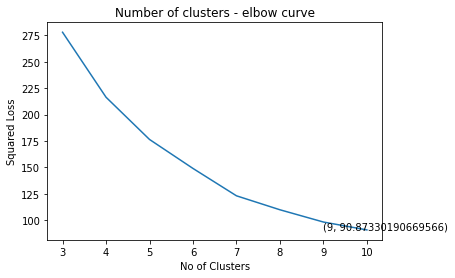

minimal number of clusters obtained: 9
Loss for each minimal cluster: 90.87330190669566


In [59]:
error= []
for i in num_clus:
    kmeans = KMeans(n_clusters = i).fit(vector_sentence)
    error.append(kmeans.inertia_)
    
minimal_cluster = np.argmin(error) + 2 
plt.plot(num_clus, error)
plt.title("Number of clusters - elbow curve")
plt.xlabel("No of Clusters")
plt.ylabel("Squared Loss")
xy = (minimal_cluster, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("minimal number of clusters obtained:", minimal_cluster)
print ("Loss for each minimal cluster:", min(error))

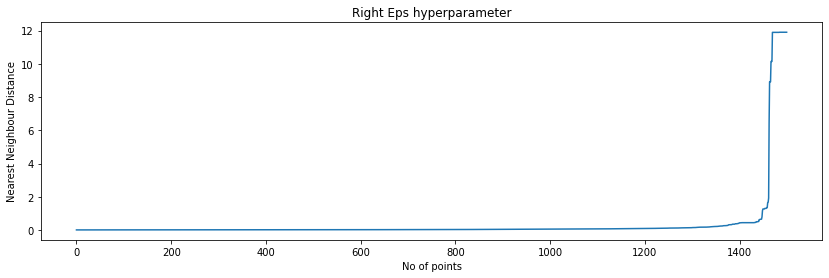

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,3422,3422,3422


In [60]:
#DBSCAN CLUSTERING

from sklearn.cluster import DBSCAN
minPts = 2 * 100

def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def neighbour_nearest(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

neighbour = []
for i in vector_sentence[:1500]:
    neighbour.append( neighbour_nearest(i, vector_sentence[:1500]) )
    
neighbour.sort()

plt.figure(figsize=(14,4))
plt.title("Right Eps hyperparameter")
plt.plot([x for x in range(len(neighbour))], neighbour)
plt.xlabel("No of points")
plt.ylabel("Nearest Neighbour Distance")
plt.show()

model_1 = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model_1.fit(vector_sentence)

dbscan_cluster = data_frame
dbscan_cluster['AVG-W2V Clus Label'] = model_1.labels_
dbscan_cluster.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

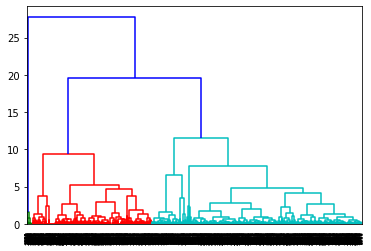

In [63]:
#Hierarchical clustering
import scipy
from scipy.cluster import hierarchy

hirera_cluster=hierarchy.dendrogram(hierarchy.linkage(vector_sentence, method='ward'))
plt.axhline(y=40)

In [62]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(vector_sentence)

hier_cluster = dbscan_cluster
hier_cluster['AVG-W2V Clus Label'] = cluster.labels_

hier_cluster.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(hier_cluster.iloc[hier_cluster.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(hier_cluster.iloc[hier_cluster.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


Very pleased


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
My fiance had this phone previously, but caused many problems. So, of course, we decided to browse amazon for a replacement til' our contract is up! & so far so good!


the reasons for the 3 star rating was it was in my opinion better than my iphone 4s but it tends to randomly crash, and randomly power off but it is good 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

Clustering is technique used to divide data into multiple groups where each item in a group have more similarity and itmes from different groups have no or low similarity.

K-Means clustering: In K means clustering, cluster similarity will be measured using mean value of the objects in cluster.

DBSCAN: It is density based clustering algorithm. The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density. 

Hierarchical clustering: Hierachial clustering involves creating clusters that have predetermined ordering from top to bottom. There are Agglomerative and Divisive hierarchial clustering approaches. 
